In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv('../data/preprocessed_reviews/nlp_cleaned_reviews.csv')

In [3]:
df['sentiment'] = df['rating'].map({1.0: 'Negative', 2.0: 'Negative', 3.0: 'Neutral', 4.0: 'Positive', 5.0: 'Positive'})

In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.shape

(4745, 14)

In [6]:
X = df['str_desc']
y = df['rating']

In [8]:
tfidf = TfidfVectorizer()
vectorized = tfidf.fit_transform(X.astype(str))
vectorized.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
x_df = pd.DataFrame(vectorized.todense())
y_labeled = df['sentiment']

In [10]:
x_df['sentiment'] = y_labeled

In [11]:
x_df.head()

,0,1,2,3,4,5,6,7,8,9,...,8383,8384,8385,8386,8387,8388,8389,8390,8391,sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral


In [12]:
X_set = x_df[x_df['sentiment'] != 'Neutral']
y_set = X_set['sentiment']
X_set = X_set.drop('sentiment', axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_set, y_set)

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, min_samples_split=8, max_depth=None)

In [15]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=8)

In [16]:
y_pred_proba = rf.predict_proba(X_test)
y_pred = rf.predict(X_test)

In [257]:
pred_df = pd.DataFrame(y_pred_proba, columns=['Negative', 'Positive'])
pred_df['prediction'] = y_pred

In [17]:
def pickle_model(model):
        with open("model.pkl", 'wb') as f:
            pickle.dump(model, f)

In [18]:
pickle_model(rf)

In [20]:
three_star_test = x_df[x_df['sentiment'] == 'Neutral']
three_star_test = three_star_test.drop('sentiment', axis=1)
three_star_pred = rf.predict_proba(three_star_test)

In [21]:
three_star_test.to_csv('../data/three_star.csv')

In [22]:
ts = pd.read_csv('../data/three_star.csv')
ts.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,8382,8383,8384,8385,8386,8387,8388,8389,8390,8391
0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [277]:
three_star_res_df = pd.DataFrame(three_star_pred, columns=['Negative', 'Positive'])

In [282]:
three_star_res_df['sentiment'] = three_star_res_df['Positive'].apply(lambda x: 'Positive' if x > 0.5 else 'Negative')

In [292]:
three_star_res_df

,Negative,Positive,sentiment
0,0.179207,0.820793,Positive
1,0.360875,0.639125,Positive
2,0.177828,0.822172,Positive
3,0.379059,0.620941,Positive
4,0.614576,0.385424,Negative
...,...,...,...
296,0.353621,0.646379,Positive
297,0.589762,0.410238,Negative
298,0.451742,0.548258,Positive
299,0.334299,0.665701,Positive


In [284]:
cs_three_star_res = three_star_res_df.copy()

In [286]:
cs_three_star_res['sentiment'] = cs_three_star_res['Positive'].apply(lambda x: 'Positive' if x > 0.79 else 'Negative')

In [287]:
cs_three_star_res.head()

,Negative,Positive,sentiment
0,0.179207,0.820793,Positive
1,0.360875,0.639125,Negative
2,0.177828,0.822172,Positive
3,0.379059,0.620941,Negative
4,0.614576,0.385424,Negative


In [289]:
three_star_og = df[df['sentiment'] == 'Neutral']

In [295]:
three_star_og = three_star_og.drop('sentiment', axis=1)
three_star_og['sentiment'] = list(three_star_res_df['sentiment'])
three_star_og_grouped = three_star_og.groupby('sentiment').count()

In [296]:
three_star_og_grouped

,asin,product,date,verified,title,desc,reviewer_name,rating,month,year,month_year,title_desc,str_desc
sentiment,,,,,,,,,,,,,
Negative,49,49,49,49,49,49,49,49,49,49,49,49,49
Positive,252,252,252,252,252,252,252,252,252,252,252,252,251


In [170]:
def predict(model, X, threshold=0.5):
    '''Return prediction of the fitted binary-classifier model model on X using
    the specifed `threshold`. NB: class 0 is the positive class'''
    print(model.predict_proba(X)[:, 1])
    return np.where(model.predict_proba(X)[:, 1] > threshold,
                    model.classes_[1],
                    model.classes_[0])

def confusion_matrix_(model, X, threshold=0.5):
    cf = pd.crosstab(y_test, predict(model, X, threshold))
    cf = cf.add(pd.DataFrame([[0,0],[0,0]], columns=['Negative', 'Positive'], index=['Negative', 'Positive']), fill_value=0)
    cf.index.name = 'actual'
    cf.columns.name = 'predicted'
    return cf

In [258]:
new_y_pred = predict(rf, X_test, threshold=0.6)
pred_df['new_y'] = new_y_pred

[0.9248722  0.31323232 0.93144758 ... 0.88790476 0.52706    0.98851948]


In [261]:
th_conf_mat = confusion_matrix_(rf, X_test, threshold=0.82)

[0.9248722  0.31323232 0.93144758 ... 0.88790476 0.52706    0.98851948]


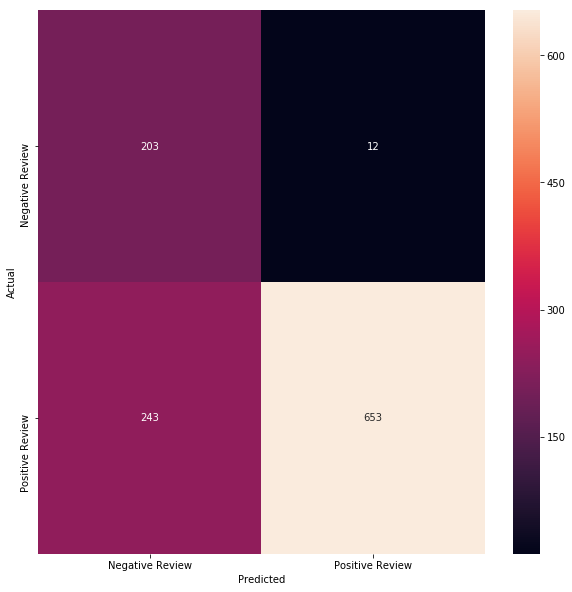

In [262]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(th_conf_mat, annot=True, fmt='d',
            xticklabels=['Negative Review', 'Positive Review'], yticklabels=['Negative Review', 'Positive Review'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [177]:
def calculate_payout(cb_matrix, model, X, threshold):
    return (confusion_matrix_(model, X, threshold) * cb_matrix).values.sum()

[0.78780016 0.32030862 0.96609177 ... 0.76997547 0.96912908 0.63757662]
[0.78780016 0.32030862 0.96609177 ... 0.76997547 0.96912908 0.63757662]
[0.78780016 0.32030862 0.96609177 ... 0.76997547 0.96912908 0.63757662]
[0.78780016 0.32030862 0.96609177 ... 0.76997547 0.96912908 0.63757662]
[0.78780016 0.32030862 0.96609177 ... 0.76997547 0.96912908 0.63757662]
[0.78780016 0.32030862 0.96609177 ... 0.76997547 0.96912908 0.63757662]
[0.78780016 0.32030862 0.96609177 ... 0.76997547 0.96912908 0.63757662]
[0.78780016 0.32030862 0.96609177 ... 0.76997547 0.96912908 0.63757662]
[0.78780016 0.32030862 0.96609177 ... 0.76997547 0.96912908 0.63757662]
[0.78780016 0.32030862 0.96609177 ... 0.76997547 0.96912908 0.63757662]
[0.78780016 0.32030862 0.96609177 ... 0.76997547 0.96912908 0.63757662]
[0.78780016 0.32030862 0.96609177 ... 0.76997547 0.96912908 0.63757662]
[0.78780016 0.32030862 0.96609177 ... 0.76997547 0.96912908 0.63757662]
[0.78780016 0.32030862 0.96609177 ... 0.76997547 0.96912908 0.63

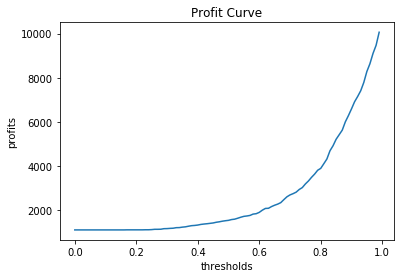

In [182]:
thresholds = np.arange(0.0, 1.0, 0.01)
profits = []
for threshold in thresholds:
    profits.append(calculate_payout(cb_matrix, rf, X_test, threshold))

fig, ax = plt.subplots()
ax.plot(thresholds, profits)
ax.set_xlabel('thresholds')
ax.set_ylabel('profits')
ax.set_title('Profit Curve');

In [77]:
rf.score(X_test, y_test)

0.8955895589558955

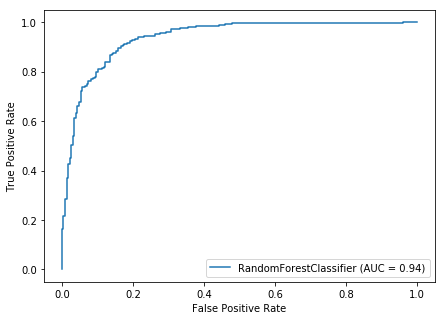

In [78]:
from sklearn.metrics import plot_roc_curve
fig, ax = plt.subplots(figsize=(7,5))
plot_roc_curve(rf, X_test, y_test, ax=ax)

### Assuming 5 dollar coupon and 5 percent likelihood of converting unhappy customer

In [79]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

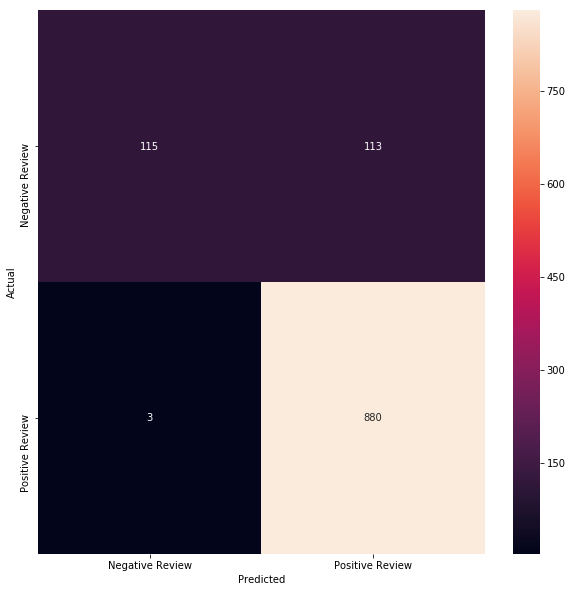

In [80]:
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred, labels=['Negative', 'Positive'])

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['Negative Review', 'Positive Review'], yticklabels=['Negative Review', 'Positive Review'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [32]:
feature_importances = np.argsort(rf.feature_importances_)

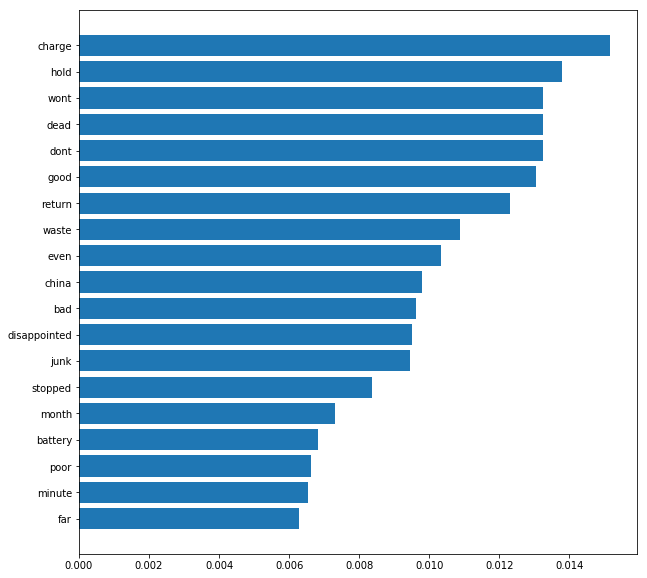

In [33]:
vect_df = pd.DataFrame(vectorized.toarray(), columns=tfidf.get_feature_names())

fig, ax = plt.subplots(figsize=(10,10))
ax.barh(vect_df.columns[feature_importances][-20:-1], rf.feature_importances_[feature_importances][-20:-1]);

In [63]:
from sklearn.naive_bayes import MultinomialNB

clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
clf_nb.predict(X_test)

In [ ]:
clf_nb.score(X_test, y_test)

In [ ]:
len(tfidf.get_feature_names())

In [32]:
df.shape

(4745, 14)

In [33]:
one_stars = df[df['rating'] == 1.0]

In [34]:
one_stars.shape

(673, 14)

In [35]:
five_stars = df[df['rating'] == 5.0]

In [36]:
five_stars.shape

(3060, 14)

In [38]:
five_star_sample = five_stars.sample(len(one_stars))

In [97]:
adjusted_df = df[df['rating'] < 5.0]

In [98]:
adjusted_df = adjusted_df.append(five_star_sample)

In [99]:
adjusted_df

,asin,product,date,verified,title,desc,reviewer_name,rating,month,year,month_year,title_desc,str_desc,sentiment
0,B08267BBJT,AAA,2020-08-11,Verified Purchase,"Didn't work, then worked, now don't work again",All I got in terms of use out of these batter...,Jasmine Carroll,1.0,8,2020,2020-08,"Didn't work, then worked, now don't work again...",didnt work worked dont work got term use batte...,Negative
1,B08267BBJT,AAA,2020-07-30,Verified Purchase,These absolutely suck,I bought these for a wall mounted magnifying ...,Ashlee M.,1.0,7,2020,2020-07,These absolutely suck I bought these for a wal...,absolutely suck bought wall mounted magnifying...,Negative
4,B08267BBJT,AAA,2020-07-17,Verified Purchase,Not long enough battery life for a night hike,Shuts off suddenly in headlamp,T,3.0,7,2020,2020-07,Not long enough battery life for a night hike ...,long enough battery life night hike shuts sudd...,Neutral
7,B08267BBJT,AAA,2020-07-01,Verified Purchase,Energy Storage Is Less Than 1/4 Normal Batteries.,"They do charge quickly, but at what price? It...",Brent R.,1.0,7,2020,2020-07,Energy Storage Is Less Than 1/4 Normal Batteri...,energy storage le 14 normal battery charge qui...,Negative
8,B08267BBJT,AAA,2020-06-28,Verified Purchase,Poor Quality - Unreliable,I had high hopes for these batteries because ...,Christian D.,1.0,6,2020,2020-06,Poor Quality - Unreliable I had high hopes for...,poor quality unreliable high hope battery desi...,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,B00HZV9WTM,AA,2020-01-06,Verified Purchase,Great value,I always buy these and have a supply of many ...,D. M. Bateman,5.0,1,2020,2020-01,Great value I always buy these and have a supp...,great value always buy supply many size home l...,Positive
352,B079JFK22D,AA,2018-12-11,Verified Purchase,Great product for the $,Used for rechargeable speaker. Came in a coup...,Michele L. Plush,5.0,12,2018,2018-12,Great product for the $ Used for rechargeable ...,great product used rechargeable speaker came c...,Positive
3821,B00HZV9WTM,AA,2019-07-17,Verified Purchase,Good value,"We love these, the time till recharge on thes...",matthew a. frentz,5.0,7,2019,2019-07,"Good value We love these, the time till rechar...",good value love time till recharge le expensiv...,Positive
1552,B07MWYYDTM,Other,2018-09-26,Verified Purchase,Great product,This batteries are excelent. 1.5v in a AA for...,Damián Jorge Daniel,5.0,9,2018,2018-09,Great product This batteries are excelent. 1.5...,great product battery excelent 15v aa format b...,Positive


In [100]:
adj_test_df = adjusted_df[adjusted_df['sentiment'] != 'Neutral']
adj_test_df.loc[:,'str_desc'] = adj_test_df.loc[:,'str_desc'].fillna('null')
adj_test_df['str_desc'].isnull().any()

/Users/ryankirkland/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


False

In [101]:
aX = adj_test_df['str_desc']
ay = adj_test_df['sentiment']

In [102]:
adj_tfidf = TfidfVectorizer()
adj_vectorized = tfidf.fit_transform(aX)

In [110]:
aX_train, aX_test, ay_train, ay_test = train_test_split(adj_vectorized, ay)

In [111]:
adj_rf = RandomForestClassifier(n_estimators=100)

In [112]:
adj_rf.fit(aX_train, ay_train)

RandomForestClassifier()

In [113]:
ay_pred_proba = adj_rf.predict_proba(aX_test)
ay_pred = adj_rf.predict(aX_test)

In [114]:
adj_rf.score(aX_test, ay_test)

0.8213592233009709

In [64]:
clf_nb = MultinomialNB()
clf_nb.fit(aX_train, ay_train)

MultinomialNB()

In [65]:
clf_nb.predict(X_test)

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [66]:
clf_nb.score(X_test, y_test)

0.8010801080108011

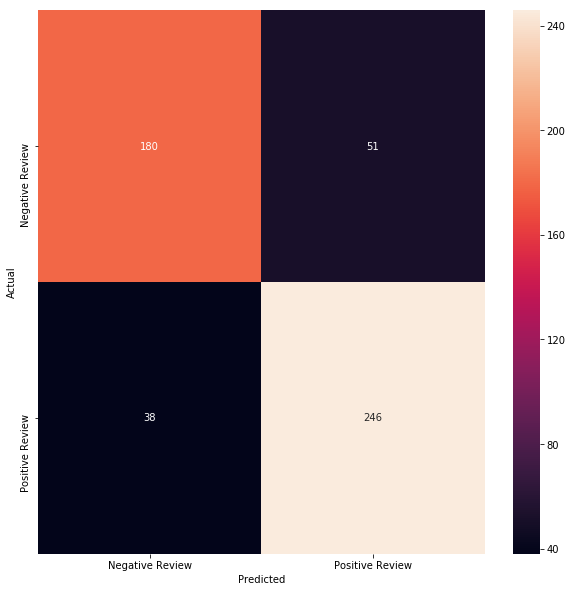

In [109]:
adj_conf_mat = confusion_matrix(ay_test, ay_pred, labels=['Negative', 'Positive'])

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(adj_conf_mat, annot=True, fmt='d',
            xticklabels=['Negative Review', 'Positive Review'], yticklabels=['Negative Review', 'Positive Review'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

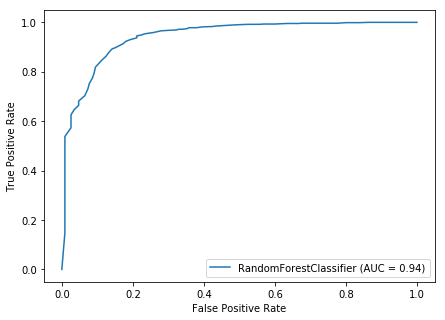

In [88]:
fig, ax = plt.subplots(figsize=(7,5))
plot_roc_curve(adj_rf, aX_test, ay_test, ax=ax)

### Assumptions:
 - $5 Coupon
 - 0.05 likelihood negative review comes back to redeem coupon
 - 0.28 likelihood buyer becomes repeat buyer
 - 0.014 likelihood of negative review becoming repeat buyer
 - CLTV of Repeat Buyer YTD is 56.25
 
 - Cost of True Positive: 0
 - Cost of False Positive Review: 0.78
 - Benefit of True Negative: 0.71
 - Benefit of False Negative Review: 5.60

In [215]:
cb_matrix = pd.DataFrame([[48.25*0.3, -56.25], [-8., 0.]], columns=["Negative", "Positive"], index=["Negative", "Positive"])
cb_matrix.index.name = 'actual'
cb_matrix.columns.name = 'predicted'
cb_matrix

predicted,Negative,Positive
actual,,
Negative,14.475,-56.25
Positive,-8.000,0.00


In [216]:
cb_matrix * conf_mat

predicted,Negative,Positive
actual,,
Negative,1664.625,-6356.25
Positive,-24.000,0.00


[0.9248722  0.31323232 0.93144758 ... 0.88790476 0.52706    0.98851948]
[0.9248722  0.31323232 0.93144758 ... 0.88790476 0.52706    0.98851948]
[0.9248722  0.31323232 0.93144758 ... 0.88790476 0.52706    0.98851948]
[0.9248722  0.31323232 0.93144758 ... 0.88790476 0.52706    0.98851948]
[0.9248722  0.31323232 0.93144758 ... 0.88790476 0.52706    0.98851948]
[0.9248722  0.31323232 0.93144758 ... 0.88790476 0.52706    0.98851948]
[0.9248722  0.31323232 0.93144758 ... 0.88790476 0.52706    0.98851948]
[0.9248722  0.31323232 0.93144758 ... 0.88790476 0.52706    0.98851948]
[0.9248722  0.31323232 0.93144758 ... 0.88790476 0.52706    0.98851948]
[0.9248722  0.31323232 0.93144758 ... 0.88790476 0.52706    0.98851948]
[0.9248722  0.31323232 0.93144758 ... 0.88790476 0.52706    0.98851948]
[0.9248722  0.31323232 0.93144758 ... 0.88790476 0.52706    0.98851948]
[0.9248722  0.31323232 0.93144758 ... 0.88790476 0.52706    0.98851948]
[0.9248722  0.31323232 0.93144758 ... 0.88790476 0.52706    0.98

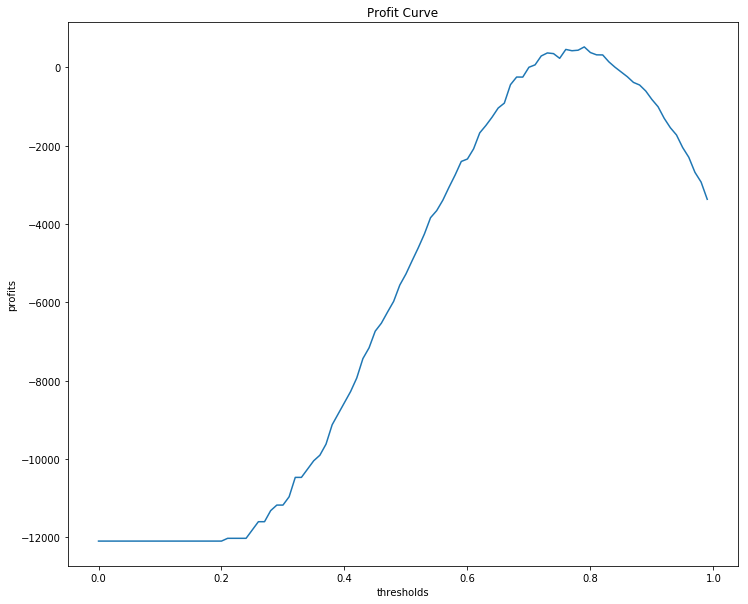

In [274]:
def calculate_payout(cb_matrix, model, X, threshold):
    return (confusion_matrix_(model, X, threshold) * cb_matrix).values.sum()

thresholds = np.arange(0.0, 1.0, 0.01)
profits = []

for threshold in thresholds:
    profits.append(calculate_payout(cb_matrix, rf, X_test, threshold))

print(thresholds[np.argmax(profits)])
fig, ax = plt.subplots(figsize=(12,10))
ax.plot(thresholds, profits)
ax.set_xlabel('thresholds')
ax.set_ylabel('profits')
ax.set_title('Profit Curve')
plt.savefig('../img/profit_curve.png');